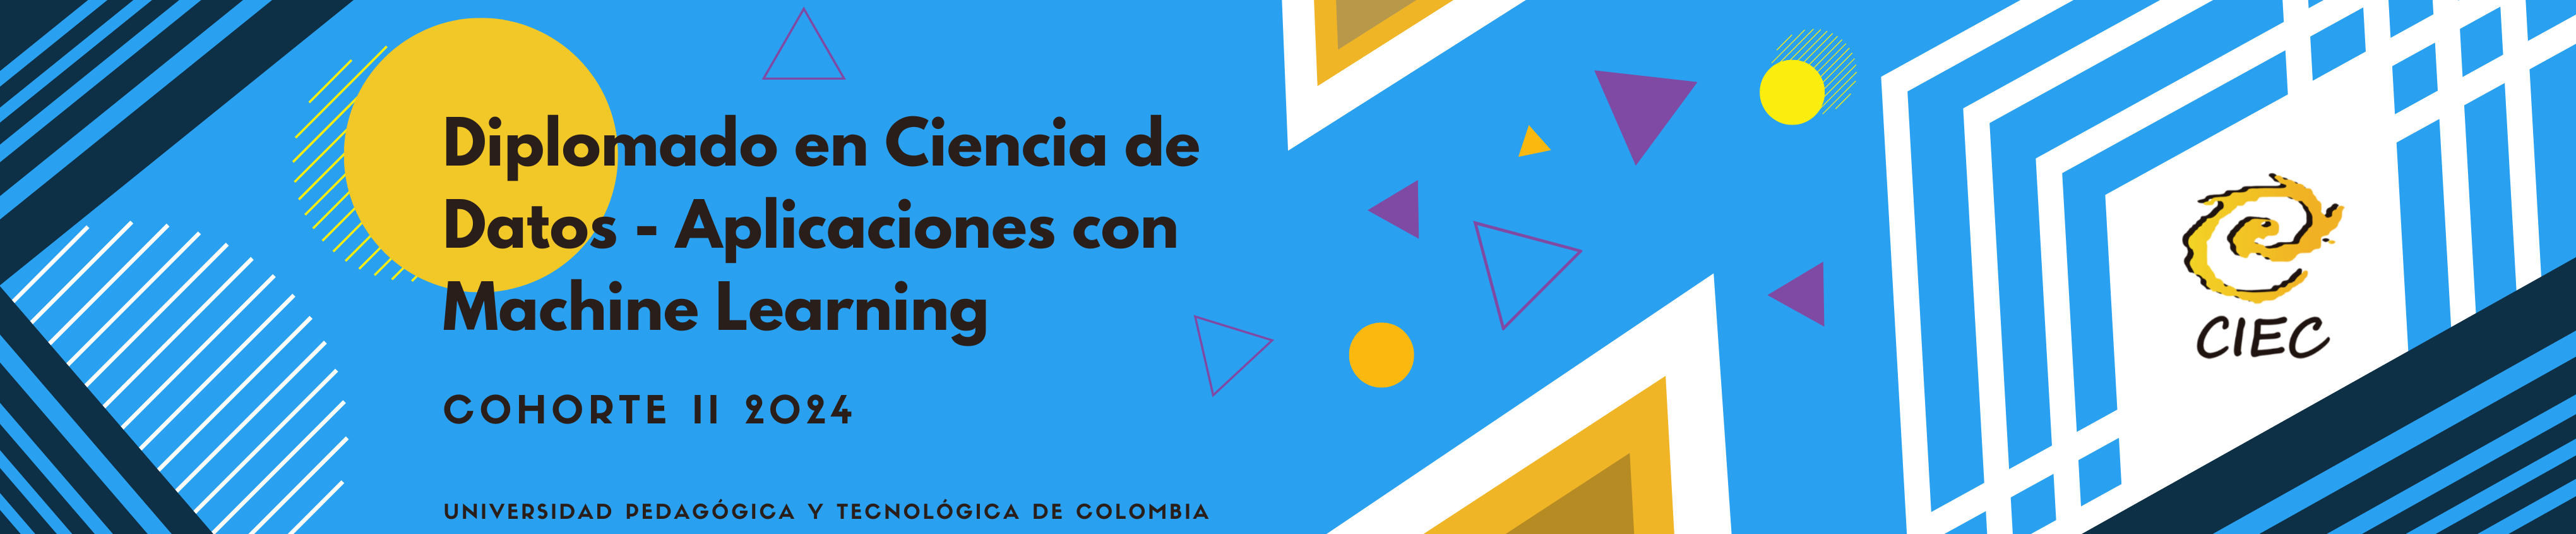

<h1 style="color: #FECB05; text-align: center;"> Mecanismos de atención </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

---

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Modelo matemático´</span>](#dim-curse)
- [<span style="color: #005C99;">Atención por similitud: Criterio Nadaraya-Watson </span>](#dim-curse)
- [<span style="color: #005C99;">Softmax enmascarada</span>](#dim-curse)
- [<span style="color: #005C99;">Modelos atencionales: Mecanismo de Atención de Bahdanau</span>](#dim-curse)
- [<span style="color: #005C99;">Mecanismos de autoatención</span>](#dim-curse)
- [<span style="color: #005C99;">Encoding posicional</span>](#dim-curse)
- [<span style="color: #005C99;">Referencias</span>](#dim-curse) 

---

<h2 style="color: #007ACC;"> Introducción </h2>

Los mecanismos de atención han revolucionado el campo del Deep Learning, especialmente en tareas donde la modelación de relaciones entre diferentes partes de los datos es esencial, como el procesamiento del lenguaje natural (NLP), la visión por computadora y la generación de secuencias. Inspirados por la manera en que los humanos focalizan su atención en información relevante mientras procesan grandes volúmenes de datos, estos mecanismos permiten a los modelos aprender qué partes de una entrada son más importantes para producir una salida determinada.

En términos simples, la atención funciona como un filtro inteligente que asigna "pesos" a diferentes elementos de una secuencia o conjunto de datos, destacando aquellos que son más relevantes para la tarea en cuestión. Esto se realiza mediante una combinación de cálculos que involucran consultas (queries), claves (keys) y valores (values), conceptos fundamentales introducidos en la arquitectura Transformer, que es la base de modelos avanzados como BERT y GPT.

Los mecanismos de atención tienen aplicaciones en:

1. **Traducción automática**: Los mecanismos de atención han mejorado significativamente la calidad de los sistemas de traducción, permitiendo a los modelos enfocarse en palabras específicas de una oración de entrada al generar su traducción.
   
2. **Visión por computadora**: En tareas como segmentación y clasificación de imágenes, la atención permite identificar regiones importantes dentro de una imagen, mejorando la precisión del modelo.

3. **Generación de texto**: Desde asistentes virtuales hasta sistemas de escritura creativa, los mecanismos de atención permiten generar texto coherente y contextualizado, adaptándose a las necesidades del usuario.

4. **Reconocimiento del habla**: En aplicaciones de procesamiento de audio, la atención ayuda a identificar patrones temporales relevantes, mejorando la transcripción y comprensión del habla.

<h2 style="color: #007ACC;"> Modelo matemático </h2>

El modelo matemático detrás de los mecanismos de atención se basa en la idea de calcular una representación ponderada de los elementos en una entrada utilizando un conjunto de consultas (\(Q\)), claves (\(K\)) y valores (\(V\)). Estos tres componentes suelen ser vectores o matrices que se obtienen al transformar la entrada inicial mediante capas aprendibles (como proyecciones lineales). La formulación matemática básica de la atención es la siguiente:

<h3 style="color: #007ACC;"> Cálculo de las puntuaciones de atención </h3>

El primer paso es medir la similitud entre cada consulta ($q_i$) y todas las claves ($k_j$) para determinar qué elementos de la entrada son relevantes. Esto se hace calculando un producto punto:

$$
\text{Score}(q_i, k_j) = q_i^\top k_j
$$

En la práctica, todas las consultas y claves suelen representarse como matrices $Q \in \mathbb{R}^{n \times d_k}$ y $K \in \mathbb{R}^{m \times d_k}$, donde $n$ es el número de consultas, $m$ el número de claves, y $d_k$ la dimensión de las mismas. El cálculo de todas las puntuaciones se compacta como:

$$
S = QK^\top
$$

<h3 style="color: #007ACC;"> Normalización de las puntuaciones </h3>

Para que las puntuaciones sean comparables y numéricamente estables, se aplica una función de normalización como el softmax. Esto transforma las puntuaciones en probabilidades:

$$
\alpha_{ij} = \frac{\exp(\text{Score}(q_i, k_j))}{\sum_{j=1}^m \exp(\text{Score}(q_i, k_j))}
$$

Aquí, $\alpha_{ij}$ representa el peso asignado a $v_j$ (el valor asociado a $k_j$ para la consulta $q_i$.

<h3 style="color: #007ACC;"> Cálculo de la salida de atención </h3>

La salida de atención para cada consulta se calcula como la combinación ponderada de los valores ($V \in \mathbb{R}^{m \times d_v}$), utilizando los pesos $\alpha_{ij}$:

$$
\text{Attention}(Q, K, V) = \alpha V = \text{softmax}(QK^\top)V
$$

Esto da como resultado una matriz de salida $\text{Attention}(Q, K, V) \in \mathbb{R}^{n \times d_v}$, donde cada fila corresponde a la representación de una consulta.

<h3 style="color: #007ACC;"> Escalamiento (Scaled Dot-Product Attention) </h3>

Para evitar problemas de estabilidad numérica, especialmente cuando $d_k$ es grande, se aplica un factor de escalamiento a las puntuaciones antes de normalizarlas:

$$
\text{Score}(q_i, k_j) = \frac{q_i^\top k_j}{\sqrt{d_k}}
$$

Esto modifica la formulación final de la atención a:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^\top}{\sqrt{d_k}}\right)V
$$

<h3 style="color: #007ACC;"> Atención Multi-Cabeza (Multi-Head Attention) </h3>

Para capturar diferentes aspectos de las relaciones en los datos, se utilizan múltiples cabezas de atención. Cada cabeza aplica la fórmula de atención de forma independiente con diferentes pesos aprendidos ($W_Q, W_K, W_V$):

$$
\text{head}_i = \text{Attention}(QW_Q^i, KW_K^i, VW_V^i)
$$

Las salidas de todas las cabezas ($\text{head}_1, \text{head}_2, \ldots, \text{head}_h$) se concatenan y se proyectan nuevamente:

$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \ldots, \text{head}_h)W_O
$$

<h2 style="color: #007ACC;"> Atención por similitud: Criterio Nadaraya-Watson </h2>

Ahora agreguemos al cálculo de los score de atención por medio de técnicas de regresión y clasificación a través de diferentes tipos de Kernel:

**Gaussian Kernel (Gaussiano):**
   $$
   \alpha(\mathbf{q}, \mathbf{k}) = \exp\left(-\frac{1}{2}\|\mathbf{q} - \mathbf{k}\|^2\right)
   $$
   
   Este kernel mide la similitud entre dos puntos $\mathbf{q}$ y $\mathbf{k}$ en función de su distancia euclidiana. Es una de las funciones más utilizadas debido a su suavidad y capacidad para capturar relaciones complejas.

**Boxcar Kernel:**
   $$
   \alpha(\mathbf{q}, \mathbf{k}) = 1 \quad \text{si } \|\mathbf{q} - \mathbf{k}\| \leq 1
   $$
   
   Este kernel es una función de paso que asigna un valor constante dentro de un rango definido (aquí, $\|\mathbf{q} - \mathbf{k}\| \leq 1$). Es útil para definir regiones específicas de influencia sin decaimiento.
   
**Epanechnikov Kernel:**
   $$
   \alpha(\mathbf{q}, \mathbf{k}) = \max(0, 1 - \|\mathbf{q} - \mathbf{k}\|)
   $$
   Este kernel tiene forma parabólica y se utiliza frecuentemente en métodos de suavizamiento debido a su eficiencia computacional y óptimas propiedades estadísticas.

Cada uno de estos kernels se selecciona según las características de los datos y los objetivos del modelo. Si necesitas más detalles o ejemplos sobre su implementación, házmelo saber.

<h3 style="color: #007ACC;"> Ejemplo </h3>

A continuación implementaremos una **estimación de Nadaraya-Watson**, un método de regresión no paramétrico que utiliza un enfoque basado en kernels para predecir un valor $y$ dado un $x$.

Supongamos un proceso generador de datos dado por la función $f(x) = 2\sin(x) + x$. Ahora, para cada punto, $x_{\text{val}}$ calcularemos la distancia  $\vert \vert x_{\text{val}} - x_{\text{train}} \vert \vert^{2}$ y aplicamos una función kernel para convertir estas distancias en pesos de atención:

$$\text{AttentionScore} = \alpha(\vert \vert x_{\text{val}} - x_{\text{train}} \vert \vert^{2})$$

Y generamos la predicción:

$$\hat{y} = \sum \text{AttentionScore} \cdot y$$

Se repite este proceso para cada valor de $x_val$. $x_val$ es un elemento del dominio de la función.

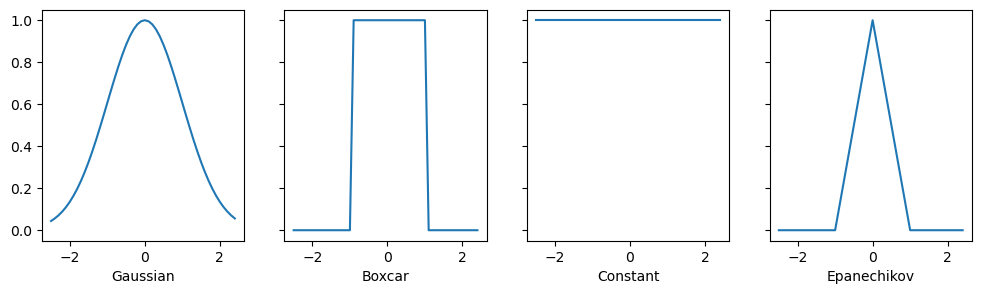

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Define some kernels
def gaussian(x):
    return tf.exp(-x**2 / 2)

def boxcar(x):
    return tf.abs(x) < 1.0

def constant(x):
    return 1.0 + 0 * x

def epanechikov(x):
    return tf.maximum(1 - tf.abs(x), 0)

fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 3))

kernels = (gaussian, boxcar, constant, epanechikov)
names = ('Gaussian', 'Boxcar', 'Constant', 'Epanechikov')
x = tf.range(-2.5, 2.5, 0.1)
for kernel, name, ax in zip(kernels, names, axes):
    ax.plot(x.numpy(), kernel(x).numpy())
    ax.set_xlabel(name)

In [2]:
def f(x):
    return 2 * tf.sin(x) + x

n = 40
x_train = tf.sort(tf.random.uniform((n,1)) * 5, 0)
y_train = f(x_train) + tf.random.normal((n, 1))
x_val = tf.range(0, 5, 0.1)
y_val = f(x_val)

In [3]:
def nadaraya_watson(x_train, y_train, x_val, kernel):
    dists = tf.reshape(x_train, (-1, 1)) - tf.reshape(x_val, (1, -1))
    # Each column/row corresponds to each query/key
    k = tf.cast(kernel(dists), tf.float32)
    # Normalization over keys for each query
    attention_w = k / tf.reduce_sum(k, 0)
    y_hat = tf.transpose(tf.transpose(y_train)@attention_w)
    return y_hat, attention_w

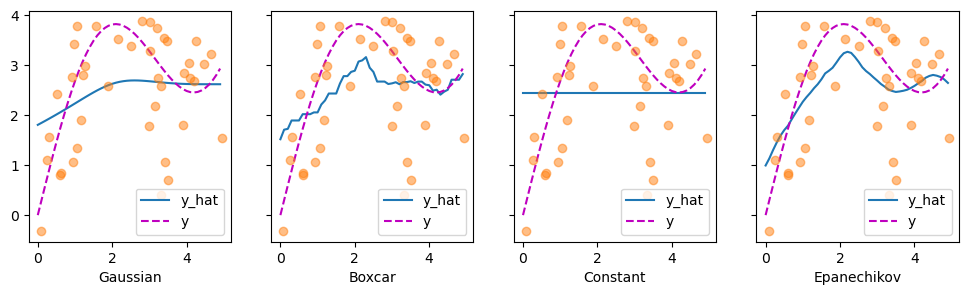

In [4]:
def plot(x_train, y_train, x_val, y_val, kernels, names, attention=False):
    fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 3))
    for kernel, name, ax in zip(kernels, names, axes):
        y_hat, attention_w = nadaraya_watson(x_train, y_train, x_val, kernel)
        if attention:
            pcm = ax.imshow(attention_w.numpy(), cmap='Reds')
        else:
            ax.plot(x_val, y_hat)
            ax.plot(x_val, y_val, 'm--')
            ax.plot(x_train, y_train, 'o', alpha=0.5);
        ax.set_xlabel(name)
        if not attention:
            ax.legend(['y_hat', 'y'])
    if attention:
        fig.colorbar(pcm, ax=axes, shrink=0.7)

plot(x_train, y_train, x_val, y_val, kernels, names)

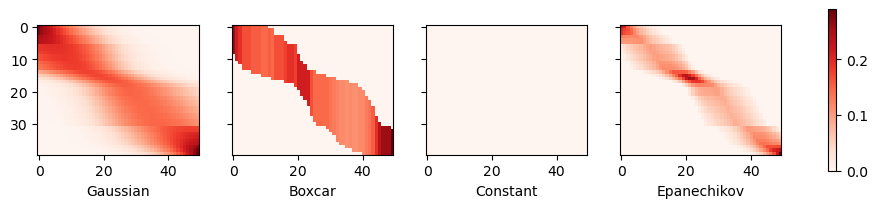

In [5]:
plot(x_train, y_train, x_val, y_val, kernels, names, attention=True)

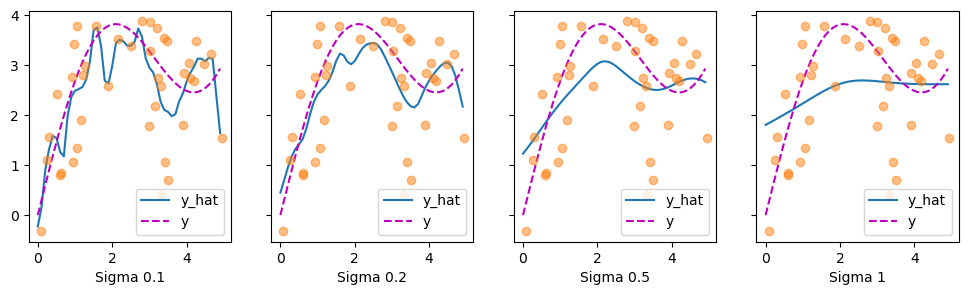

In [6]:
sigmas = (0.1, 0.2, 0.5, 1)
names = ['Sigma ' + str(sigma) for sigma in sigmas]

def gaussian_with_width(sigma):
    return (lambda x: tf.exp(-x**2 / (2*sigma**2)))

kernels = [gaussian_with_width(sigma) for sigma in sigmas]
plot(x_train, y_train, x_val, y_val, kernels, names)

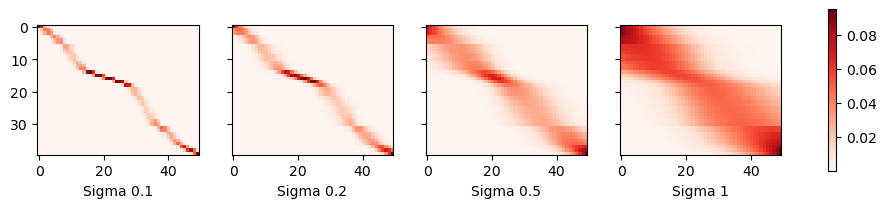

In [7]:
plot(x_train, y_train, x_val, y_val, kernels, names, attention=True)

Pese a que esta técnica de predicción tiene más de medio siglo, sigue siendo bastante útil, y corresponde a los principios de las técnicas modernas de inteligencia artificial. En realidad, son la base sobre la que se soporta el artículo científico que cambió para siempre el desarrollo de la inteligencia artificial en el siglo XXI: [Attention is all you need](https://arxiv.org/pdf/1706.03762)

<h2 style="color: #007ACC;"> Softmax enmascarada </h2>

Una de las aplicaciones más populares del mecanismo de atención es en los modelos de secuencia. Por lo tanto, necesitamos ser capaces de manejar secuencias de diferentes longitudes. En algunos casos, dichas secuencias pueden terminar en el mismo mini lote, lo que requiere rellenarlas con tokens ficticios para las secuencias más cortas. Estos tokens especiales no tienen significado. Por ejemplo, supongamos que tenemos las siguientes tres oraciones:

```
Hola. PAD PAD PAD PAD PAD PAD PAD PAD PAD
El sol brilla. PAD PAD PAD PAD PAD PAD
Los pájaros cantan por la mañana mientras el sol se eleva.
```

En este ejemplo, el token `PAD` no tiene absolutamente ningún significado, por lo que prestarle *atención* sería inútil. Una estrategia para solventar este problema sería limitar el largo de la secuencia que queremos procesar:

$$\sum_{i = 1}^{n} \alpha(q, k) \cdot v, \hspace{0.2in} \text{para} \hspace{0.2in} l \leq n$$

<h2 style="color: #007ACC;"> Modelos atencionales: Mecanismo de Atención de Bahdanau </h2>

El Mecanismo de Atención de Bahdanau, introducido por Dzmitry Bahdanau en 2014, es una técnica innovadora en el campo del aprendizaje profundo aplicada especialmente en tareas de secuencia a secuencia, como la traducción automática. Este mecanismo mejora los modelos tradicionales de codificador-decodificador al permitir que el decodificador enfoque su atención en diferentes partes de la secuencia de entrada en cada paso del proceso de generación. En lugar de depender exclusivamente de un vector de contexto fijo que resume toda la información de entrada, el Mecanismo de Atención calcula un conjunto dinámico de pesos que priorizan las palabras o características más relevantes para cada predicción. Esta capacidad de focalización dinámica permite manejar secuencias largas y mejora significativamente la calidad de las predicciones en aplicaciones de procesamiento de lenguaje natural y visión por computadora.

<h3 style="color: #007ACC;"> Autoencoder con mecanismo de atención </h3>

**Encoder**

El rol del codificador es generar una anotación, $h_i$, para cada palabra, $x_i$, en una oración de entrada de longitud $n$ palabras. Para este propósito, Bahdanau et al. emplean una RNN bidireccional, que lee la oración de entrada en la dirección hacia adelante para producir un estado oculto hacia adelante, $\overrightarrow{h_i}$, y luego lee la oración de entrada en la dirección inversa para producir un estado oculto hacia atrás, $\overleftarrow{h_i}$. La anotación para una palabra específica, $h_i$, concatena ambos estados:

$$h_i = \begin{bmatrix} \overrightarrow{h_i} \\ \overleftarrow{h_i} \end{bmatrix} $$

La idea detrás de generar cada anotación de esta manera es capturar un resumen tanto de las palabras precedentes como de las palabras siguientes. Las anotaciones generadas se pasan luego al decodificador para generar el vector de contexto.

**Decoder**

El rol del decodificador es producir las palabras objetivo enfocándose en la información más relevante contenida en la oración fuente. Para ello, utiliza un mecanismo de atención. Cada vez que el modelo propuesto genera una palabra en una traducción, realiza una búsqueda (suave) para identificar un conjunto de posiciones en la oración fuente donde se concentra la información más relevante. El modelo predice entonces una palabra objetivo basándose en los vectores de contexto asociados con estas posiciones fuente y todas las palabras objetivo generadas previamente.

El decodificador toma cada anotación y la pasa a un modelo de alineación, $e_{ij}$, junto con el estado oculto previo del decodificador, $s_{i-1}$. Esto genera un puntaje de atención:

$$
e_{ij} = a(s_{i-1}, h_j)
$$

La función implementada por el modelo de alineación combina $s_{i-1}$ y $h_j$ usando una operación de suma. Por esta razón, el mecanismo de atención implementado por Bahdanau et al. se conoce como *atención aditiva*.

Esto puede implementarse de dos maneras: aplicando una matriz de pesos, $W_a$, sobre los vectores concatenados $s_{i-1}$ y $h_j$, o  aplicando las matrices de pesos $W_s$ y $W_h$ a $s_{i-1}$ y $h_j$ por separado:

$$
e_{ij} = v_a^\top \tanh(W_s s_{i-1} + W_h h_j)
$$

Aquí, $v_a$ es un vector de pesos.

El modelo de alineación está parametrizado como una red neuronal y se entrena conjuntamente con los demás componentes del sistema.

Posteriormente, se aplica una función *softmax* a cada puntaje de atención para obtener el valor correspondiente del peso:

$$
\alpha_{ij} = \frac{\exp(e_{ij})}{\sum_k \exp(e_{ik})}
$$

La aplicación de la función *softmax* normaliza los valores de las anotaciones en un rango entre 0 y 1; por lo tanto, los pesos resultantes pueden considerarse valores de probabilidad. Cada valor de probabilidad (o peso) refleja la importancia de $h_j$ y $s_{i-1}$ en la generación del siguiente estado, $s_i$, y la siguiente salida, $y_i$.

De manera intuitiva, esto implementa un mecanismo de atención en el decodificador. El decodificador decide qué partes de la oración fuente merecen más atención. Al incorporar un mecanismo de atención, se libera al codificador de la carga de codificar toda la información de la oración fuente en un vector de longitud fija.

Finalmente, se calcula el vector de contexto como una suma ponderada de las anotaciones:

$$
c_i = \sum_j \alpha_{ij} h_j
$$

<h2 style="color: #007ACC;"> Mecanismos de autoatención </h2>

Los mecanismos de autoatención son una de las innovaciones más importantes en el aprendizaje profundo, especialmente en modelos de procesamiento de lenguaje natural. A diferencia de los mecanismos de atención tradicionales, que calculan pesos para vincular elementos de una secuencia de entrada con elementos de una secuencia de salida, la autoatención permite que cada elemento de una secuencia se relacione con todos los demás elementos de esa misma secuencia. Esto se logra asignando pesos que indican la importancia relativa de cada palabra (o token) en el contexto de las demás. Este enfoque permite capturar relaciones globales y dependencias a largo plazo dentro de la secuencia, lo que es crucial para tareas como la traducción automática, la generación de texto y el análisis de sentimientos. Además, los mecanismos de autoatención son altamente paralelizables, lo que los hace eficientes para procesar grandes volúmenes de datos. Introducidos como parte del modelo Transformer, los mecanismos de autoatención han redefinido el estado del arte en diversas aplicaciones de inteligencia artificial.

Por ejemplo, consideremos el siguiente texto: *"El gato persiguió al ratón en el jardín."*; ahora encontraremos las relaciones entre palabras del texto usando autoatención.

**Tokenización del texto:**  

   $$
   [\text{"El"}, \text{"gato"}, \text{"persiguió"}, \text{"al"}, \text{"ratón"}, \text{"en"}, \text{"el"}, \text{"jardín"}]
   $$

**Representación inicial (embeddings):**  

Cada token se representa como un vector en un espacio continuo, utilizando técnicas como Word2Vec o embeddings entrenados. Por simplicidad, asumimos que las representaciones son los siguientes vectores:

   $$
   [v_{\text{"El"}}, v_{\text{"gato"}}, v_{\text{"persiguió"}}, \dots, v_{\text{"jardín"}}]
   $$

**Cálculo de la autoatención:

Para cada token, se calculan tres matrices: **Consulta (Query)**, **Clave (Key)**, y **Valor (Value)**, mediante multiplicaciones con matrices de pesos entrenables:

   $$
   Q = XW_Q, \quad K = XW_K, \quad V = XW_V
   $$

   Aquí, $\mathbf{X}$ representa los embeddings iniciales, y $\mathbf{W}_Q$, $\mathbf{W}_K$, y $\mathbf{W}_V$ son matrices de transformación entrenables.

**Cálculo de los pesos de atención:**  

Los pesos de atención para cada token se calculan utilizando el producto escalar entre las consultas $\mathbf{Q}$ y las claves $\mathbf{K}$, normalizados mediante una función softmax. Por ejemplo, para el token "gato":

   $$
   \text{Atención}_{\text{"gato"}} = \text{softmax}\left(\frac{Q_{\text{"gato"}} K^\top}{\sqrt{d_k}}\right)
   $$

   Aquí, $d_k$ es la dimensión del vector de clave. Este cálculo da como resultado un conjunto de pesos que indican cuánto "atención" debe prestarle "gato" a cada otro token, incluidos él mismo.

   Supongamos que obtenemos estos pesos para "gato":  
   $$
   [0.1, 0.4, 0.3, 0.05, 0.1, 0.02, 0.02, 0.01]
   $$

   Esto indica que "gato" se relaciona más fuertemente con "persiguió" y "ratón".

**Cálculo de los vectores finales:**  
   Los pesos calculados se utilizan para combinar los vectores de valor $\mathbf{V}$ de todos los tokens, produciendo un nuevo vector contextualizado para cada token. Para "gato", esto sería:

   $$
   C_{\text{"gato"}} = \sum (\text{Atención}_{\text{"gato"}} \cdot V)
   $$

Este proceso se repite para todos los tokens, produciendo vectores que capturan relaciones contextuales dentro de la oración.

<h2 style="color: #007ACC;"> Encoding posicional </h2>

Típicamente no existe una estructura secuencial inherente en los datos procesados, a diferencia de arquitecturas como las RNNs. Esto ocurre porque el mecanismo de autoatención trata todos los tokens de entrada como un conjunto, sin un orden explícito. Para incorporar información sobre la posición de cada token en la secuencia, se utilizan los **encoding posicionales**, que agregan una representación numérica que indica la posición de cada token dentro de la secuencia.

El encoding posicional es una técnica que introduce esta información posicional en el modelo mediante vectores que se suman (o concatenan) con los embeddings de los tokens. Esto asegura que el modelo pueda distinguir, por ejemplo, entre la palabra "gato" al inicio de una oración y "gato" al final.

Vaswani et al. (2017), en el artículo "Attention Is All You Need", introducen una fórmula basada en funciones sinusoidales para calcular los encodings posicionales. La fórmula es:

$$
PE_{(pos, 2i)} = \sin\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
$$
$$
PE_{(pos, 2i+1)} = \cos\left(\frac{pos}{10000^{\frac{2i}{d_{\text{model}}}}}\right)
$$

Donde:
- $pos$ es la posición del token en la secuencia (0, 1, 2, ...).
- $i$ es el índice de la dimensión del vector.
- $d_{\text{model}}$ es la dimensionalidad del espacio de embeddings.

El uso de funciones seno y coseno asegura que las posiciones cercanas tengan representaciones similares, mientras que las posiciones distantes sean fácilmente distinguibles.

**Ejemplo**

Supongamos que tenemos:
- Una secuencia de 4 tokens con posiciones $pos = 0, 1, 2, 3$.
- Dimensionalidad del embedding $d_{\text{model}} = 4$.

1. Para $pos = 0$:
   - $PE(0, 0) = \sin(0 / 10000^{0/4}) = \sin(0) = 0$
   - $PE(0, 1) = \cos(0 / 10000^{0/4}) = \cos(0) = 1$
   - $PE(0, 2) = \sin(0 / 10000^{2/4}) = \sin(0) = 0$
   - $PE(0, 3) = \cos(0 / 10000^{2/4}) = \cos(0) = 1$

Resultado: $[0, 1, 0, 1]$

2. Para $pos = 1$:
   - $PE(1, 0) = \sin(1 / 10000^{0/4}) = \sin(1)$
   - $PE(1, 1) = \cos(1 / 10000^{0/4}) = \cos(1)$
   - $PE(1, 2) = \sin(1 / 10000^{2/4}) \approx \sin(0.01) \approx 0.01$
   - $PE(1, 3) = \cos(1 / 10000^{2/4}) \approx \cos(0.01) \approx 1$

Resultado aproximado: $[\sin(1), \cos(1), 0.01, 1]$

3. Para $pos = 2$:
   - $PE(2, 0) = \sin(2 / 10000^{0/4}) = \sin(2)$
   - $PE(2, 1) = \cos(2 / 10000^{0/4}) = \cos(2)$
   - $PE(2, 2) = \sin(2 / 10000^{2/4}) \approx \sin(0.02) \approx 0.02$
   - $PE(2, 3) = \cos(2 / 10000^{2/4}) \approx \cos(0.02) \approx 1$

Resultado aproximado: $[\sin(2), \cos(2), 0.02, 1]$

Estos vectores de posición ($PE$) se suman directamente a los embeddings de los tokens. Por ejemplo, si el embedding de "gato" es $[1.2, 0.7, 0.5, -0.3]$ y su encoding posicional es $[0, 1, 0, 1]$, el embedding resultante será:

$$
[1.2, 0.7, 0.5, -0.3] + [0, 1, 0, 1] = [1.2, 1.7, 0.5, 0.7]
$$

Esto permite que el modelo no solo procese las relaciones semánticas entre tokens, sino que también tenga en cuenta su posición relativa en la secuencia.

<h2 style="color: #007ACC;"> Referencias </h2>

- Capítulo 11 del libro Dive into Deep Learning: https://d2l.ai/chapter_attention-mechanisms-and-transformers/index.html
- Sección de mecanismos de atención de diplomado de inteligencia artíficial básico de la Universidad Nacional y la empresa Aprendizaje Profundo, dictado por los expertos Álvaro Montenegro Díaz y Daniel Montenegro Reyes. Repositorio disponible en: https://github.com/contreras-juan/Diplomado-Avanzado/blob/main/Tratamiento%20de%20Lenguaje%20Natural%20(PLN)/Cuadernos/pln_sesion_04_01_mecanismos_atencion.ipynb
- Sección de mecanismos de autoatención de diplomado de inteligencia artíficial básico de la Universidad Nacional y la empresa Aprendizaje Profundo, dictado por los expertos Álvaro Montenegro Díaz y Daniel Montenegro Reyes. Repositorio disponible en: https://github.com/contreras-juan/Diplomado-Avanzado/blob/main/Tratamiento%20de%20Lenguaje%20Natural%20(PLN)/Cuadernos/pln_sesion_04_03_auto_atencion_pln.ipynb
- Artículo The Bahdanau Attention Mechanism del blog Machine Learning Mastery: https://machinelearningmastery.com/the-bahdanau-attention-mechanism/
- Artículo original de Dzmitry Bahdanau, KyungHyun Cho y  Yoshua Bengio: https://arxiv.org/pdf/1409.0473